In [1]:
import pandas as pd
data = pd.read_csv("iris.csv")
data

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:>

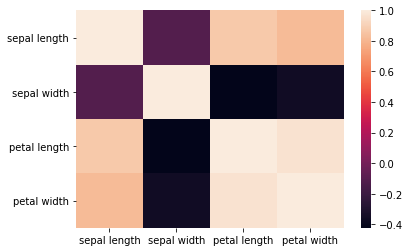

In [2]:
import seaborn as sns
sns.heatmap(data.corr())

In [3]:
data.drop(labels = ["class"], axis = 1, inplace = True)
data

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
pred = model.fit_predict(data)
model.cluster_centers_

array([[6.85000000e+00, 3.07368421e+00, 5.74210526e+00, 2.07105263e+00,
        2.00000000e+00],
       [5.00408163e+00, 3.42653061e+00, 1.46326531e+00, 2.46938776e-01,
        1.00000000e+00],
       [5.90161290e+00, 2.74838710e+00, 4.39354839e+00, 1.43387097e+00,
        7.77156117e-16]])

In [16]:
k_range = range(1,10)
sse = []
for k in k_range:
    model_1 = KMeans(n_clusters = k)
    model_1.fit_predict(data)
    sse.append(model_1.inertia_)
    
sse

[674.0142281879197,
 152.28703013481373,
 78.83105367104396,
 57.20808545918367,
 46.42579429617997,
 38.9722359233359,
 34.46322053872051,
 30.044637205387204,
 27.960707896222786]

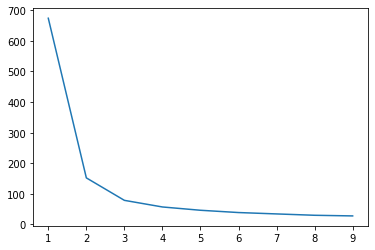

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, sse)

In [18]:
data["cluster"] = pred
data

,sepal length,sepal width,petal length,petal width,cluster
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,0
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


No handles with labels found to put in legend.


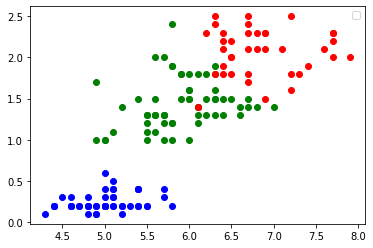

In [25]:
data_0 = data[data.cluster == 0]
data_1 = data[data.cluster == 1]
data_2 = data[data.cluster == 2]

plt.scatter(data_0["sepal length"], data_0["petal width"], color = "green")
plt.scatter(data_1["sepal length"], data_1["petal width"], color = "blue")
plt.scatter(data_2["sepal length"], data_2["petal width"], color = "red")
plt.legend()